In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
keras = tf.keras
layers = keras.layers

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
vocab_size = 10000
imdb = keras.datasets.imdb
(data_trn, label_trn), (data_tst, label_tst) = imdb.load_data(num_words=vocab_size)

In [4]:
word_index = imdb.get_word_index()

In [5]:
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [6]:
reverse_word_index = {value : key for (key, value) in word_index.items()}

In [7]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [8]:
decode_review(data_trn[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [9]:
maxlen = 500
data_trn = keras.preprocessing.sequence.pad_sequences(data_trn, value=word_index['<PAD>'], padding='post', maxlen=maxlen)
data_tst = keras.preprocessing.sequence.pad_sequences(data_tst, value=word_index['<PAD>'], padding='post', maxlen=maxlen)

In [11]:
model = keras.Sequential()
model.add(layers.Embedding(vocab_size, 16))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
n_val = 10000
x_val = data_trn[:n_val]
x_trn = data_trn[n_val:]
y_val = label_trn[0:n_val]
y_trn = label_trn[n_val:]

In [15]:
history = model.fit(x_trn, y_trn, epochs=40, validation_data=(x_val, y_val), verbose=1)

W0610 14:12:31.762770 28992 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 5s 362us/sample - loss: 0.6501 - accuracy: 0.6668 - val_loss: 0.5387 - val_accuracy: 0.8105
Epoch 2/40
15000/15000 [==============================] - 4s 286us/sample - loss: 0.4096 - accuracy: 0.8583 - val_loss: 0.3472 - val_accuracy: 0.8707
Epoch 3/40
15000/15000 [==============================] - 4s 293us/sample - loss: 0.2858 - accuracy: 0.8957 - val_loss: 0.3021 - val_accuracy: 0.8828
Epoch 4/40
15000/15000 [==============================] - 4s 290us/sample - loss: 0.2350 - accuracy: 0.9132 - val_loss: 0.2876 - val_accuracy: 0.8844
Epoch 5/40
15000/15000 [==============================] - 5s 311us/sample - loss: 0.1996 - accuracy: 0.9286 - val_loss: 0.2795 - val_accuracy: 0.8953
Epoch 6/40
15000/15000 [==============================] - 5s 318us/sample - loss: 0.1743 - accuracy: 0.9393 - val_loss: 0.2780 - val_accuracy: 0.8932
Epoch 7/40
15000/15000 [==========================

In [16]:
results = model.evaluate(data_tst, label_tst)

25000/25000 [==============================] - 2s 87us/sample - loss: 1.1117 - accuracy: 0.8432


In [17]:
results

[1.1116931204813718, 0.84324]

In [18]:
history_dict = history.history

In [21]:
acc_trn = history_dict['accuracy']
acc_val = history_dict['val_accuracy']
loss_trn = history_dict['loss']
loss_val = history_dict['val_loss']
epochs = range(1, len(acc_trn)+1)

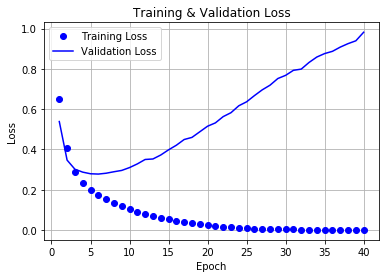

In [23]:
plt.plot(epochs, loss_trn, 'bo', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

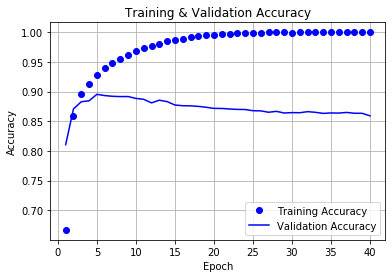

In [24]:
plt.plot(epochs, acc_trn, 'bo', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()